# Lab 2 numerical work
### Plot $\hat{P}(\hat{V})$, $\hat{G}(\hat{V})$, and $\hat{G}(\hat{P})$:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

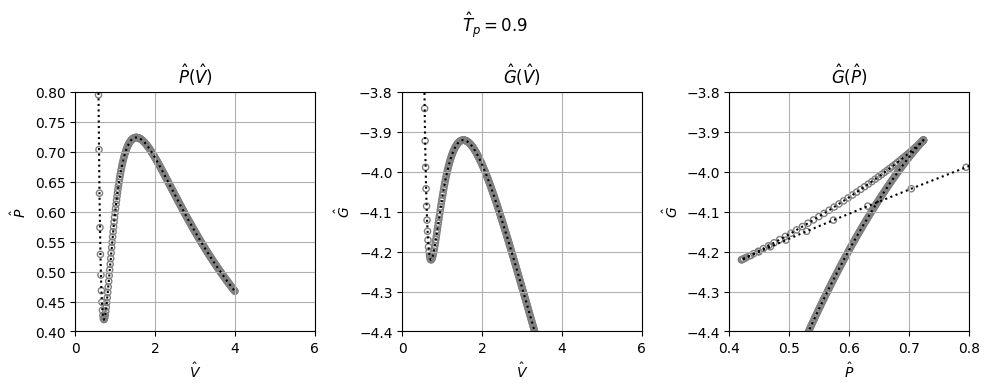

In [161]:
# Parameters
T_hat_b = 0.9  # boiling temperature
V_hat = np.linspace(0.35, 4, 300)  # V_hat >=  1/3, otherwise we get ln(negative number) in G_hat.

# Plotting parameters
scatter_size = 20
scatter_color = "gray"
plot_marker = "k:"

# Expressions
P_hat = 8 * T_hat_b / (3 * V_hat - 1) - 3 / V_hat**2
G_hat = -8/3 * T_hat_b * np.log(3*V_hat - 1) - 3/V_hat + P_hat * V_hat

fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.suptitle("$\hat{T}_p=$" + str(T_hat_b), y=0.8)

# Plot P_hat(V_hat)
axs[0].scatter(V_hat, P_hat, scatter_size, color=scatter_color, facecolors="none")
axs[0].plot(V_hat, P_hat, plot_marker)
axs[0].set_xlabel("$\hat{V}$")
axs[0].set_ylabel("$\hat{P}$")
axs[0].set_title("$\hat{P}(\hat{V})$")
axs[0].set_xlim(0, 6)
axs[0].set_ylim(0.4, 0.8)
axs[0].set_box_aspect(1)
axs[0].grid(True)

# Plot G_hat(V_hat):
axs[1].scatter(V_hat, G_hat, scatter_size, color=scatter_color, facecolors="none")
axs[1].plot(V_hat, G_hat, plot_marker)
axs[1].set_xlabel("$\hat{V}$")
axs[1].set_ylabel("$\hat{G}$")
axs[1].set_title("$\hat{G}(\hat{V})$")
axs[1].set_xlim(0, 6)
axs[1].set_ylim(-4.4, -3.8)
axs[1].set_box_aspect(1)
axs[1].grid(True)

# Plot G_hat(P_hat):
axs[2].scatter(P_hat, G_hat, scatter_size, color=scatter_color, facecolors="none")
axs[2].plot(P_hat, G_hat, plot_marker)
axs[2].set_xlabel("$\hat{P}$")
axs[2].set_ylabel("$\hat{G}$")
axs[2].set_title("$\hat{G}(\hat{P})$")
axs[2].set_xlim(0.4, 0.8)
axs[2].set_ylim(-4.4, -3.8)
axs[2].set_box_aspect(1)  # make plot square 
axs[2].grid(True)

plt.tight_layout()

### Determine the coexistance line numerically: